In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

In [ ]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

In [ ]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
size = os.stat('data/NYPD_Complaint_Data_Historic.csv')
size
#### END SOLUTION

In [ ]:
# Using utils library, find the number of lines in the file

### BEGIN SOLUTION
from utils import *
line_count('data/NYPD_Complaint_Data_Historic.csv')

### END SOLUTION

In [ ]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### BEGIN SOLUTION
from utils import *
import itertools
total_lines = line_count('data/NYPD_Complaint_Data_Historic.csv')
file = 'data/NYPD_Complaint_Data_Historic.csv'
rounding_error = int(np.ceil(float(total_lines)/10))
for i in range(10):
    with open(file, "r")as f:
        fw = open ('data/NYPD_Complaint_Data_Historic_%d.csv' % (i+1), "w")
        sliced_f = itertools.islice(f, i*rounding_error,min((i+1)*rounding_error, total_lines))
        for line in sliced_f:
            fw.write(line)

### END SOLUTION

In [ ]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

In [3]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '325341655,02/11/2015,15:00:00,,,73,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749,VIOLATION OF ORDER OF PROTECTI,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,,TILDEN,405,1009656,181287,25-44,BLACK,M,,40.664239422,-73.908425011,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,,<18,BLACK,M\n',
 '393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,NA,,NA,1014035,174133,,,,,40.644589618,-73.892672426,"

# Exploratory Data Analysis

In [4]:
### BEGIN SOLUTION
import pandas as pd
import time

start = time.time() 
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv")
calls.head()
stop = time.time()

print(stop-start) #subtracting stop since it's the bigger time than the start which we put before our executed code
### END SOLUTION

/Users/mgrewal1999/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3.634348154067993


### Description of Fields

In [5]:
### BEGIN SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed.
# ANSWER -> Following the reasonable rule of thumb of removing data that's missing more than 50% of its data, we can
# safely remove the columns : STATION_NAME, TRANSIT_DISTRICT, SUSP_RACE, SUSP_SEX, SUSP_AGE_GROUP, HOUSING_PSA, 
# HADEVELOPT, PARK_NM since these columns are below the 50% threshold of 349,160 values.

# I got the threshold of 349,160 by dividing the total entries (698320) by 2 and got rid of every column that was 
# below that 50% threshold.

### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698320 entries, 0 to 698319
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         698320 non-null  int64  
 1   CMPLNT_FR_DT       698217 non-null  object 
 2   CMPLNT_FR_TM       698310 non-null  object 
 3   CMPLNT_TO_DT       485124 non-null  object 
 4   CMPLNT_TO_TM       485769 non-null  object 
 5   ADDR_PCT_CD        697981 non-null  float64
 6   RPT_DT             698320 non-null  object 
 7   KY_CD              698320 non-null  int64  
 8   OFNS_DESC          695589 non-null  object 
 9   PD_CD              697748 non-null  float64
 10  PD_DESC            697748 non-null  object 
 11  CRM_ATPT_CPTD_CD   698317 non-null  object 
 12  LAW_CAT_CD         698320 non-null  object 
 13  BORO_NM            696639 non-null  object 
 14  LOC_OF_OCCUR_DESC  541355 non-null  object 
 15  PREM_TYP_DESC      693375 non-null  object 
 16  JU

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.983200e+05,697981.000000,698320.000000,697748.000000,697748.000000,53392.000000,6.952920e+05,6.952920e+05,14388.000000,695292.000000,695292.000000
mean,5.499528e+08,63.341648,293.182045,420.764002,0.639387,5901.545887,1.004596e+06,2.069389e+05,13.783083,40.734632,-73.926554
std,2.598946e+08,34.489549,147.789657,216.877451,6.135040,12575.698465,2.210343e+04,3.187596e+04,12.627524,0.087417,0.079712
min,1.000051e+08,1.000000,101.000000,101.000000,0.000000,5.000000,1.557610e+05,1.211310e+05,1.000000,40.498905,-76.982022
25%,3.249954e+08,40.000000,117.000000,254.000000,0.000000,489.000000,9.916220e+05,1.842090e+05,3.000000,40.672243,-73.973443
50%,5.498239e+08,63.000000,341.000000,397.000000,0.000000,721.000000,1.004234e+06,2.058400e+05,11.000000,40.731663,-73.927868
75%,7.751063e+08,94.000000,351.000000,637.000000,0.000000,1233.000000,1.016506e+06,2.353720e+05,30.000000,40.812699,-73.883531
max,9.999991e+08,123.000000,881.000000,969.000000,97.000000,66563.000000,1.067298e+06,6.216843e+06,34.000000,56.974143,-73.700316


### 2.2 Finding Uniques


In [6]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from? 5
# 2. How many age groups are represented in the data set? 55
# 3. How many boroughs are included in the data set? 5
# 4. How many offense types are listed in this data set? 71

### END SOLUTION

CMPLNT_NUM           698320
CMPLNT_FR_DT           5594
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           4860
CMPLNT_TO_TM           1441
ADDR_PCT_CD              77
RPT_DT                 4427
KY_CD                    71
OFNS_DESC                63
PD_CD                   377
PD_DESC                 367
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            71
JURIS_DESC               23
JURISDICTION_CODE        23
PARKS_NM                 97
HADEVELOPT              268
HOUSING_PSA            2030
X_COORD_CD            55981
Y_COORD_CD            59138
SUSP_AGE_GROUP           20
SUSP_RACE                 8
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude              83911
Longitude             83910
Lat_Lon               83920
PATROL_BORO               8
STATION_NAME            367
VIC_AGE_GROUP            55
VIC_RACE                  8
VIC_SEX                   5
dtype: int64

In [7]:
### BEGIN SOLUTION

calls_by_Boro_and_offense = calls.groupby(by = 'BORO_NM')

#printing the results using a for loop
for i, j in calls_by_Boro_and_offense:
    print(calls_by_Boro_and_offense.get_group(i))
### END SOLUTION

        CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
7        882178622   09/14/2013     08:40:00   09/14/2013     08:40:00   
8        240183498   01/31/2013     23:47:00          NaN          NaN   
16       253264123   12/10/2012     12:09:00   12/10/2012     12:10:00   
20       896725438   10/20/2015     14:00:00   10/20/2015     16:00:00   
26       380032100   06/08/2013     19:20:00   06/08/2013     19:25:00   
...            ...          ...          ...          ...          ...   
698305   486075648   04/20/2006     09:50:00   04/20/2006     09:55:00   
698307   430326372   06/01/2011     17:30:00          NaN          NaN   
698310   417448660   08/30/2010     01:30:00   08/30/2010     14:30:00   
698313   390046571   02/19/2008     05:30:00          NaN          NaN   
698316   742908768   08/31/2008     15:30:00   08/31/2008     15:39:00   

        ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
7              49.0  09/14/201

        CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
4        300349533   12/11/2013     13:30:00   12/11/2013     14:15:00   
10       450452011   10/21/2012     00:30:00   10/21/2012     00:35:00   
11       470101747   06/03/2014     18:25:00          NaN          NaN   
13       326188407   02/06/2013     10:45:00   02/06/2013     11:00:00   
15       971510739   09/22/2015     15:00:00          NaN          NaN   
...            ...          ...          ...          ...          ...   
698296   127291356   07/01/2009     14:00:00   07/01/2009     14:10:00   
698298   943263524   10/29/2008     18:20:00          NaN          NaN   
698299   978411727   01/20/2010     05:03:00   01/20/2010     05:19:00   
698304   754005668   02/08/2006     10:00:00   02/08/2006     10:00:00   
698308   854328083   01/06/2009     08:30:00          NaN          NaN   

        ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
4              24.0  12/12/201

        CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
14       882568598   06/28/2017     09:30:00   06/28/2017     09:45:00   
31       529864644   08/06/2013     20:00:00   08/07/2013     08:00:00   
32       662210384   06/28/2017     11:20:00   06/28/2017     11:22:00   
56       455442968   03/15/2016     23:00:00   03/16/2016     08:00:00   
87       683550005   12/22/2012     20:32:00          NaN          NaN   
...            ...          ...          ...          ...          ...   
698199   347422953   03/17/2007     00:30:00   03/18/2007     01:30:00   
698200   950463562   06/12/2009     17:30:00          NaN          NaN   
698242   950662165   06/19/2007     18:00:00          NaN          NaN   
698314   556209138   12/30/2009     00:01:00   12/30/2009     05:30:00   
698315   954183893   07/29/2007     22:00:00          NaN          NaN   

        ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
14            120.0  06/28/201

In [8]:
### BEGIN SOLUTION
bronx = calls[calls['BORO_NM'] == 'BRONX']['OFNS_DESC'].unique()
bronx
### END SOLUTION

# How many offenses were committed in Bronx during the analysis period? 
# Answer -> Using the .unique() method, we can conclude that there are exactly 57 committed offenses in Bronx

array(['HARRASSMENT 2', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS',
       'BURGLARY', 'THEFT-FRAUD', 'CRIMINAL MISCHIEF & RELATED OF',
       'GRAND LARCENY', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'ROBBERY', 'DANGEROUS WEAPONS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'FELONY ASSAULT', 'GRAND LARCENY OF MOTOR VEHICLE',
       'UNAUTHORIZED USE OF A VEHICLE', 'OFFENSES AGAINST PUBLIC ADMINI',
       'MISCELLANEOUS PENAL LAW', 'FORGERY', 'VEHICLE AND TRAFFIC LAWS',
       'ADMINISTRATIVE CODE', 'FRAUDS', 'INTOXICATED & IMPAIRED DRIVING',
       'OFFENSES INVOLVING FRAUD', 'SEX CRIMES',
       'OFFENSES AGAINST THE PERSON', 'POSSESSION OF STOLEN PROPERTY',
       'GAMBLING', 'RAPE', nan, 'ARSON', 'OFFENSES RELATED TO CHILDREN',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'OTHER OFFENSES RELATED TO THEF',
       'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES', 'OTHER STATE LAWS',
       'PROSTITUTION & RELATED

###  Most Common Crimes in NYC

In [9]:
### BEGIN SOLUTION
five = calls[calls['BORO_NM'] == 'BRONX']['OFNS_DESC'].value_counts()
five.head(5)
### END SOLUTION

DANGEROUS DRUGS                   19251
PETIT LARCENY                     17995
HARRASSMENT 2                     17755
ASSAULT 3 & RELATED OFFENSES      16307
CRIMINAL MISCHIEF & RELATED OF    14528
Name: OFNS_DESC, dtype: int64

###  Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [10]:
### BEGIN SOLUTION
# In order to calculate the probablity, we need the total number of crimes in Bronx then Arson specifically, 
# then divide total number of crimes in Bronx by arson crimes in bronx specifically. 
crime_in_bronx = calls[calls['BORO_NM'] == 'BRONX'].shape[0]
arson_in_bronx = calls[(calls['OFNS_DESC'] == 'ARSON') & (calls['BORO_NM'] == 'BRONX')].shape[0]
probability = arson_in_bronx/crime_in_bronx
probability
### END SOLUTION

0.003364043725959314

---
# Visualizing the Data

## Pandas vs. Seaborn Plotting

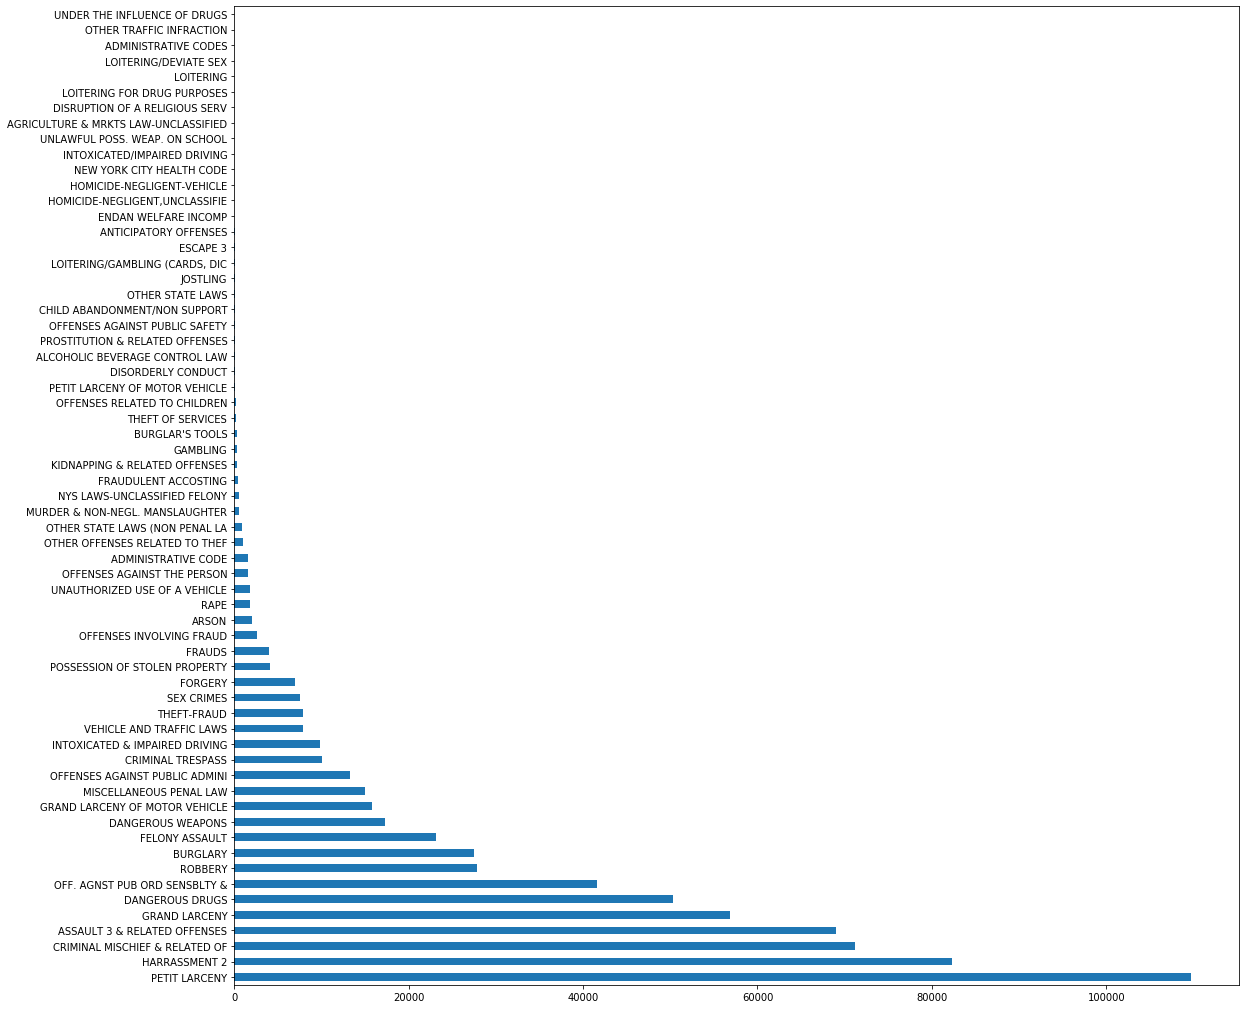

In [11]:
### BEGIN SOLUTION
# let a variable hold our vlues then .plot with barh kind
barh = calls['OFNS_DESC'].value_counts()
barh.plot(kind='barh', figsize = (18,18))
### END SOLUTION

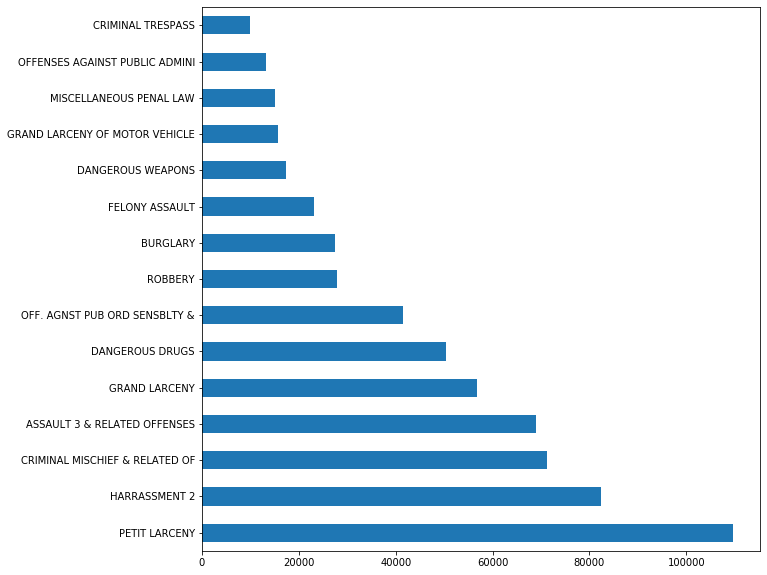

In [12]:
### BEGIN SOLUTION
barh[barh>10000].plot(kind = 'barh',figsize =(10,10))
### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0.5, 1.0, 'Number of Calls By Crime Type')

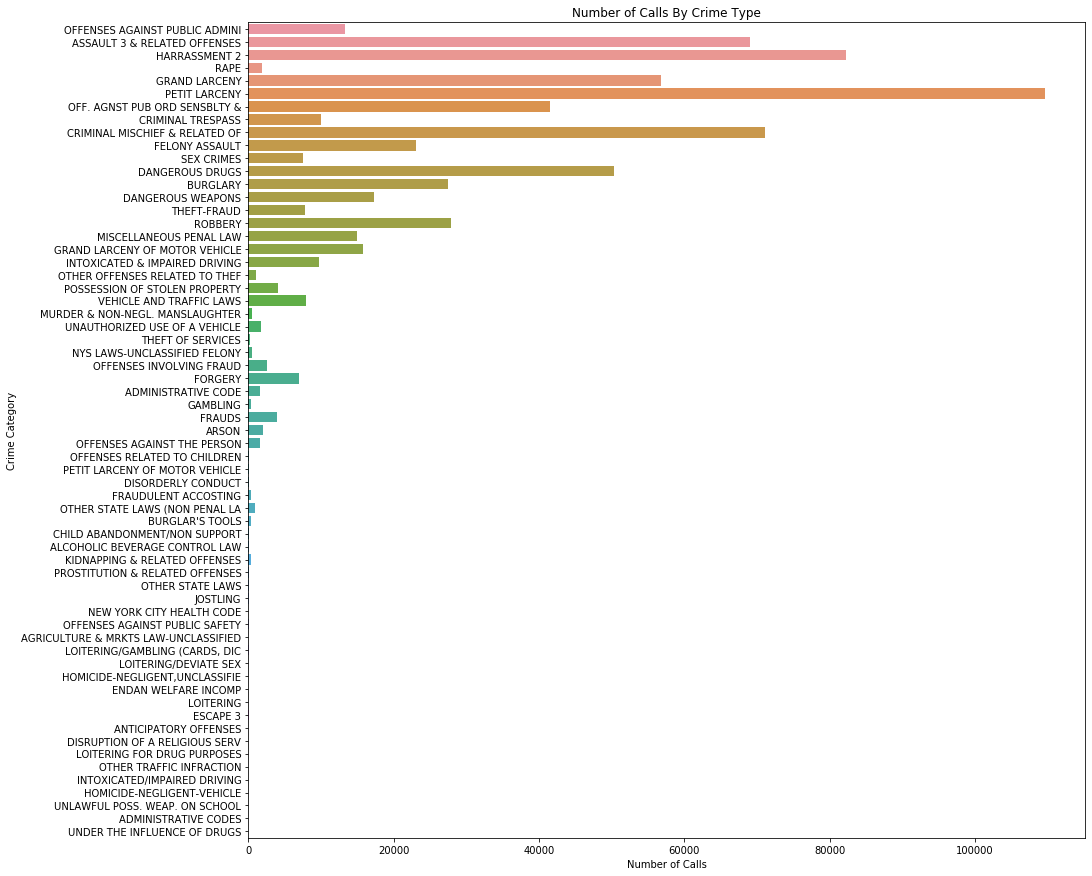

In [13]:
### BEGIN SOLUTION
plt.figure(figsize=(15,15))
first_seaborn = sns.countplot(data = calls, y = 'OFNS_DESC')
first_seaborn.set_ylabel('Crime Category')
first_seaborn.set_xlabel('Number of Calls')
first_seaborn.set_title('Number of Calls By Crime Type')
### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

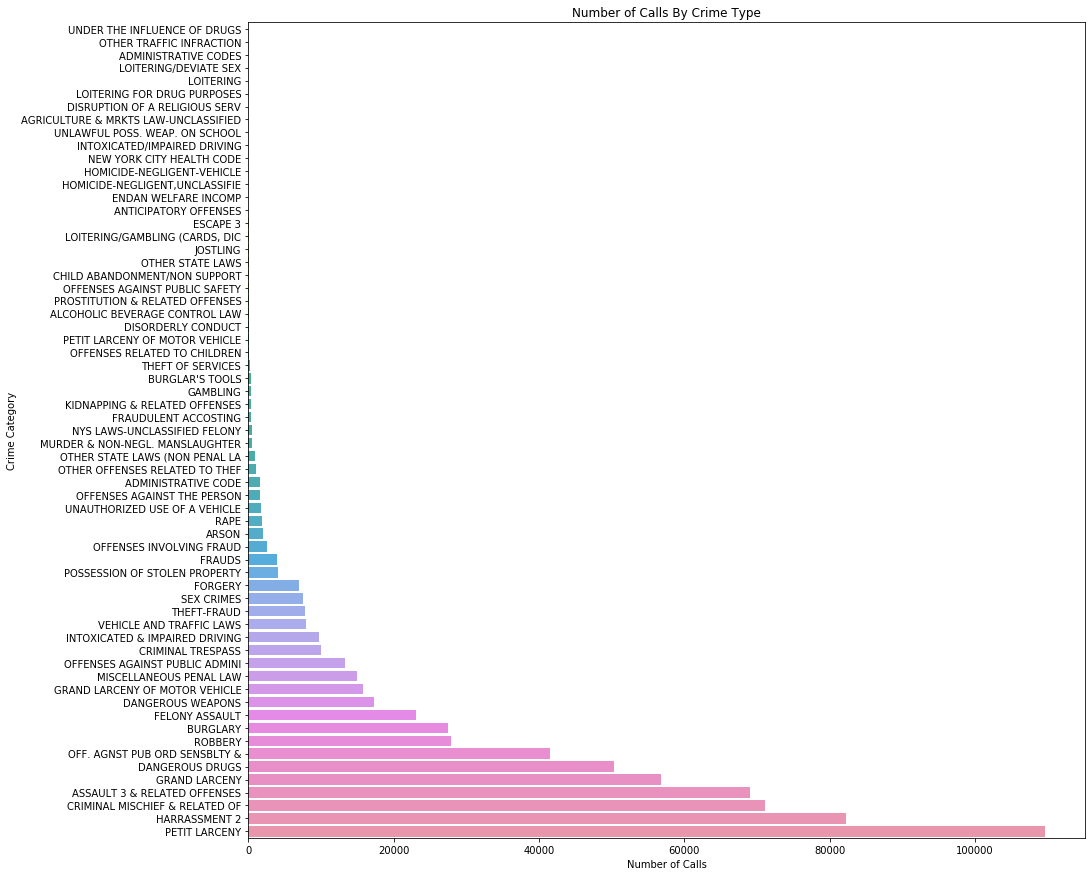

In [14]:
### BEGIN SOLUTION
plt.figure(figsize=(15,15))
first_seaborn = sns.countplot(order = reversed(barh.keys()),data = calls, y = 'OFNS_DESC')
first_seaborn.set_ylabel('Crime Category')
first_seaborn.set_xlabel('Number of Calls')
first_seaborn.set_title('Number of Calls By Crime Type')
### END SOLUTION

In [15]:
### BEGIN SOLUTION
import datetime
import calendar
def day(date):
   
  if(pd.isnull(date)): #takes care of the nan field values 
     return
  new_date = str(date)
 
  incident_occured = datetime.datetime.strptime(new_date, '%m/%d/%Y').weekday()
  return (calendar.day_name[incident_occured])

#print(findDay(calls.loc[0,"CMPLNT_FR_DT"]))

calls['DAY_OF_WEEK'] = [day(calls.loc[i,"CMPLNT_FR_DT"]) for i in range(calls.shape[0])]
calls['DAY_OF_WEEK']
### END SOLUTION

0         Wednesday
1          Saturday
2          Thursday
3          Thursday
4         Wednesday
            ...    
698315       Sunday
698316       Sunday
698317       Monday
698318     Saturday
698319     Saturday
Name: DAY_OF_WEEK, Length: 698320, dtype: object

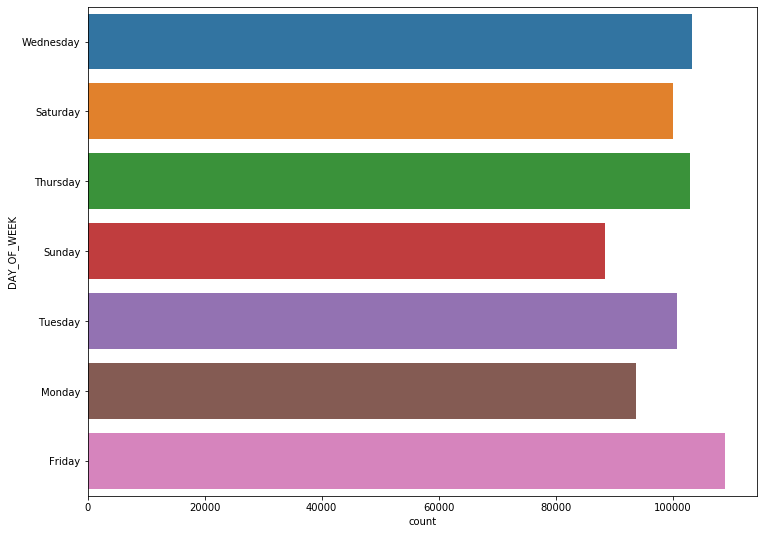

In [16]:
### BEGIN SOLUTION
rotation = sns.countplot( data = calls, y = 'DAY_OF_WEEK')
### END SOLUTION

Text(0.5, 0, 'DAY_OF_WEEK')

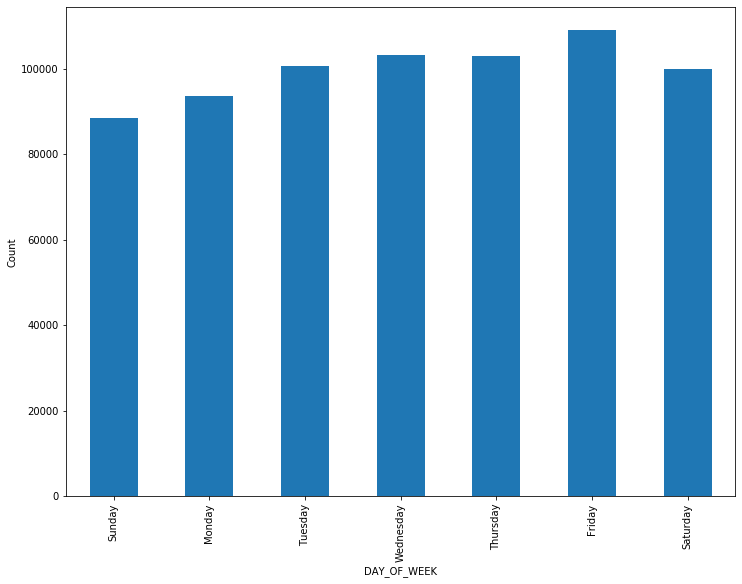

In [17]:
### BEGIN SOLUTION
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday" ]

count = calls['DAY_OF_WEEK'].value_counts()
plot = count[days].plot(kind = 'bar')
plot.set_ylabel('Count')
plot.set_xlabel('DAY_OF_WEEK')
### END SOLUTION

## What Day of the Week is more calls?

Text(0.5, 1.0, '# of Calls by Harrassment per day')

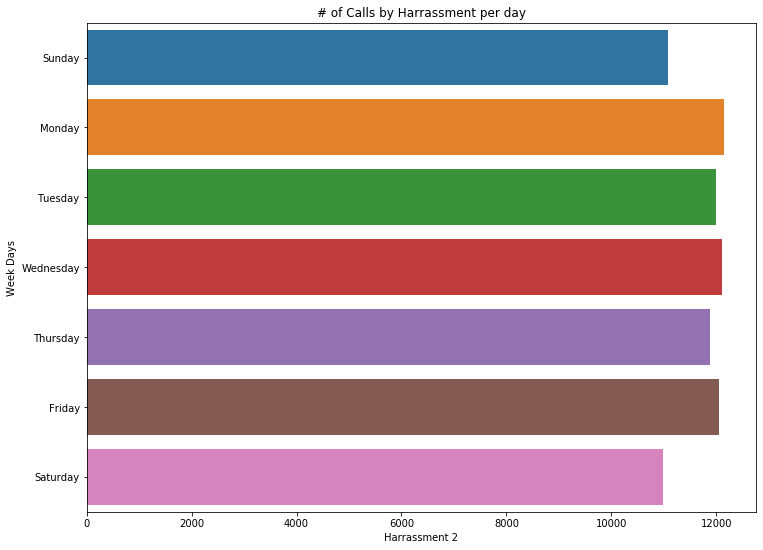

In [18]:
### BEGIN SOLUTION
harassment = calls[calls['OFNS_DESC'] == 'HARRASSMENT 2']
vertical = sns.countplot(data = harassment,y = "DAY_OF_WEEK",order = days)
vertical.set_xlabel('Harrassment 2')
vertical.set_ylabel('Week Days')
vertical.set_title('# of Calls by Harrassment per day')
### END SOLUTION

Text(0.5, 1.0, '# of Calls by Burglary per day')

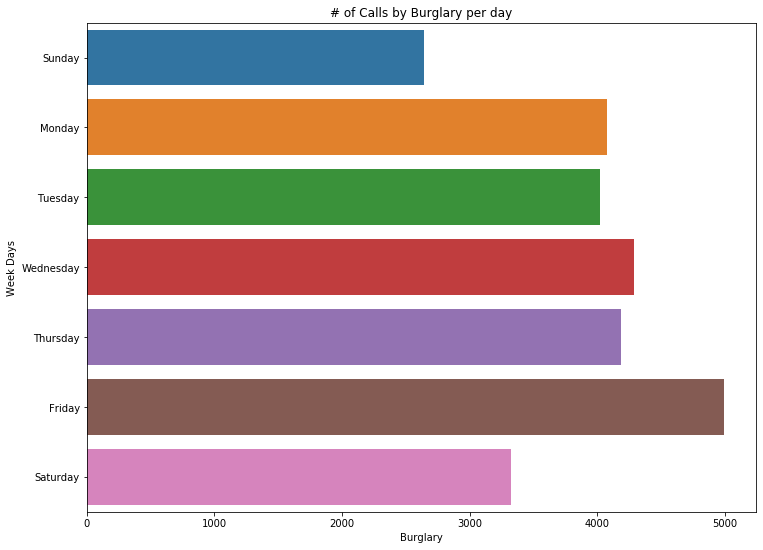

In [19]:
### BEGIN SOLUTION
burg = calls[calls['OFNS_DESC'] == 'BURGLARY']
vertical = sns.countplot(data = burg,y = "DAY_OF_WEEK",order = days)
vertical.set_xlabel('Burglary')
vertical.set_ylabel('Week Days')
vertical.set_title('# of Calls by Burglary per day')
### END SOLUTION

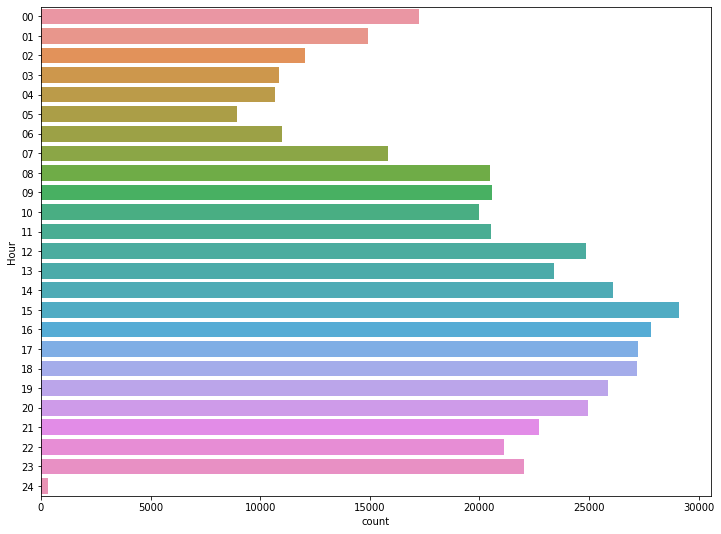

In [20]:
### BEGIN SOLUTION
calls['Hour'] = calls["CMPLNT_TO_TM"].str.slice(0,2)
hourinfo = calls['Hour'].dropna().reset_index()
sns.countplot(data = hourinfo , y = 'Hour')
### END SOLUTION

Text(0, 0.5, 'Number of Calls')

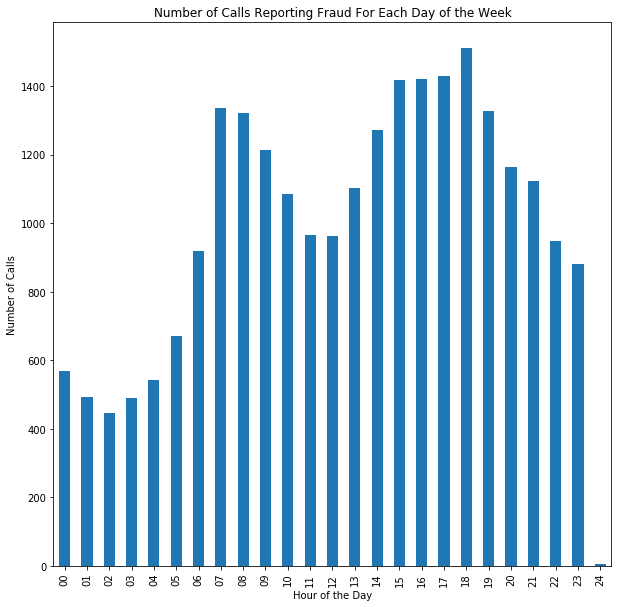

In [21]:
### BEGIN SOLUTION
each = calls[calls['OFNS_DESC'] == 'BURGLARY']
sumeach = each['Hour'].value_counts().sort_index()
barh = sumeach.plot(kind = 'bar', figsize=(10,10))
barh.set_title("Number of Calls Reporting Fraud For Each Day of the Week")
barh.set_xlabel("Hour of the Day")
barh.set_ylabel("Number of Calls")
### END SOLUTION

Text(0.5, 0, 'Number of Calls')

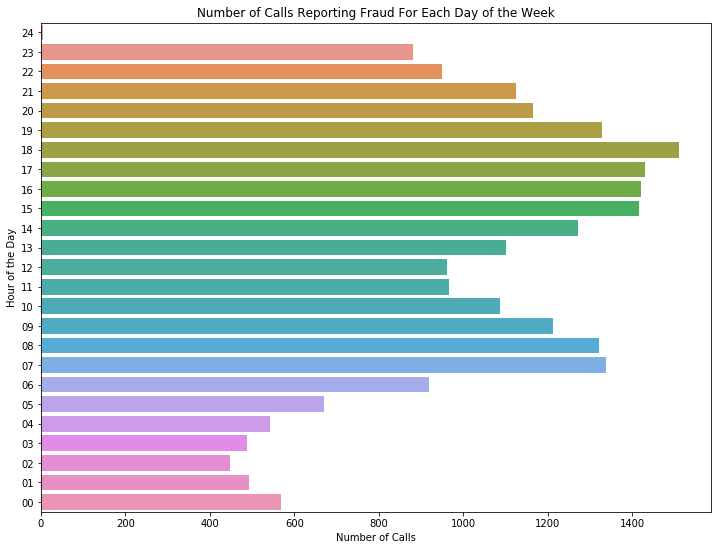

In [22]:
### BEGIN SOLUTION
barh = sns.countplot(data = each,y = 'Hour', order = reversed(sumeach.keys()))
barh.set_title("Number of Calls Reporting Fraud For Each Day of the Week")
barh.set_ylabel("Hour of the Day")
barh.set_xlabel("Number of Calls")
### END SOLUTION

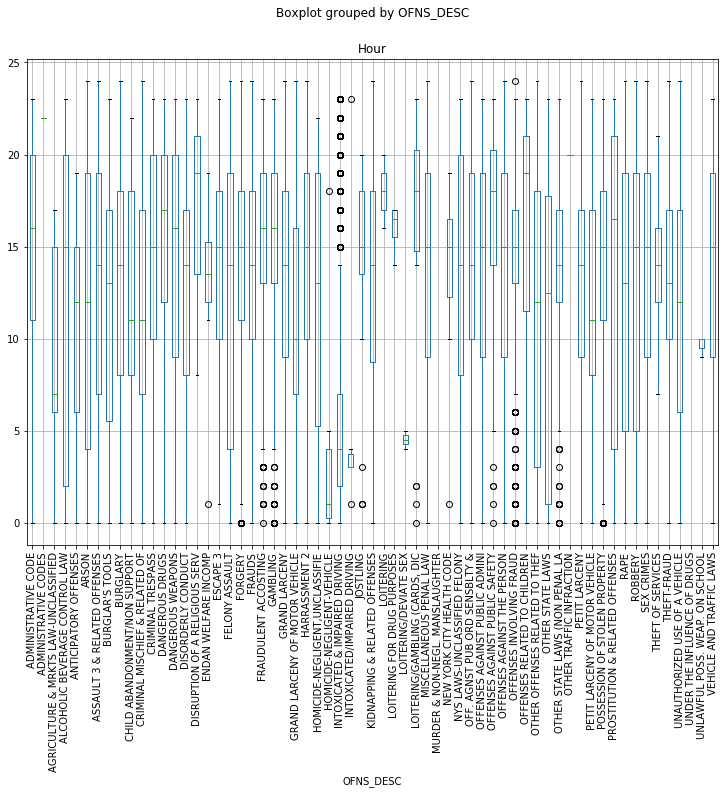

In [23]:
calls['Hour'] = calls['Hour'].dropna().astype(int)
calls.boxplot (column = "Hour", by = 'OFNS_DESC', rot = 90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

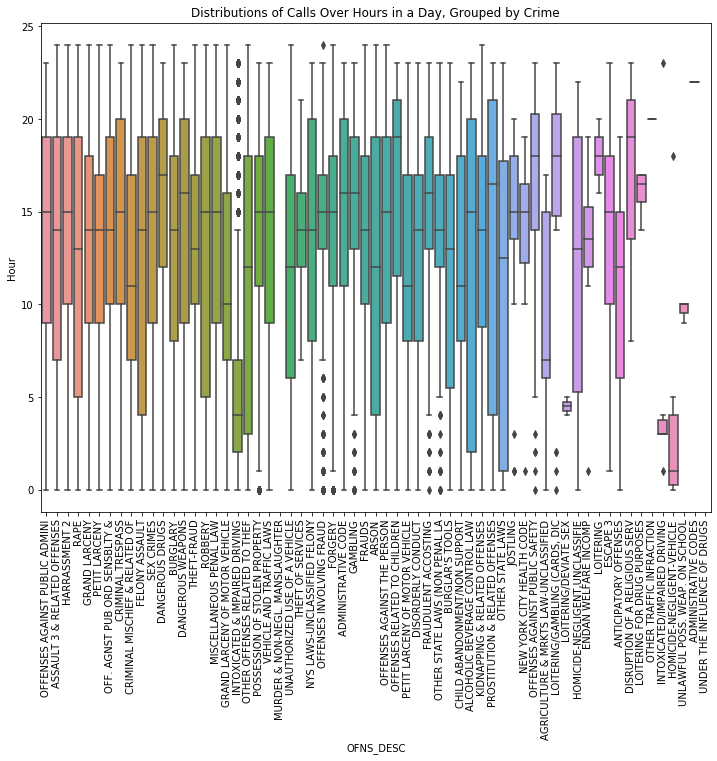

In [24]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = sns.boxplot(x = 'OFNS_DESC', y = 'Hour', data = calls )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distributions of Calls Over Hours in a Day, Grouped by Crime');
answer = 'Prostitution & Related Offenses'
### END SOLUTION